In [1]:

# Need this for some of the helper functions

import torch as t

# Some nice preliminary functions for testing.

def assert_with_expect(expected, actual):
    assert expected == actual, f"Expected: {expected} Actual: {actual}"


def assert_list_of_floats_within_epsilon(
    expected: list[float], 
    actual: list[float],
    eps=0.0001,
):
    if len(expected) != len(actual):
        raise AssertionError(f"Expected: {expected} Actual: {actual}")
    is_within_eps = True
    for e, a in zip(expected, actual):
        is_within_eps = is_within_eps and abs(e - a) < eps
    if not is_within_eps:
        raise AssertionError(f"Expected: {expected} Actual: {actual}")


def assert_tensors_within_epsilon(
    expected: t.Tensor,
    actual: t.Tensor,
    eps=0.001,
):
    if expected.shape != actual.shape:
        raise AssertionError(f"Shapes of tensors do not match! Expected: {expected.shape} Acutal: {actual.shape}")
    differences_within_epsilon = abs(expected - actual) < eps
    if not differences_within_epsilon.all():
        raise AssertionError(f"Values of tensors do not match! Expected: {expected} Actual: {actual}")

In [2]:

# We're going to begin by defining neural networks in a way that emphasizing
# each individual neuron. This is very inefficient and impractical for any real
# neural network (at least in Python). Also by thinking at the individual neuron
# level, this obscures a lot of larger structures in a neural net that can
# actually make it more difficult to understand what's going on at a high-level.
#
# Nonetheless, it's a reasonable starting point for understanding why we call a
# neural net "neural." We'll redo our neural net using matrices later in this
# section to demonstrate how they're actually written "in the wild."
#
# Let's begin by defining one of the simplest non-linear activation functions
# out there. We'll need this as the last step of computation when defining what
# a single neuron does.

def relu(x: float) -> float:
    """
    ReLU (rectified linear unit), one of the simplest non-linear activation
    functions out there.
    """
    # TODO: Fill this in!
    return max(0, x)
    # raise NotImplementedError()

assert_with_expect(expected=5.0, actual=relu(5.0))
assert_with_expect(expected=0.0, actual=relu(-1.0))

In [3]:
from dataclasses import dataclass

# Now let's define a single neuron. If you want a reminder of how a single
# neuron is structured, look at
# https://github.com/changlinli/intro-to-technical-ai-safety-slides/blob/master/neural_nets/slides.md#a-single-neuron-also-called-node
# (note that the diagram is a bit misleading w.r.t. bias, bias isn't always +1,
# it can be + some other constant!).
#
# For now don't worry about using tensors to carry this out, normal Python
# iteration is perfectly fine.

@dataclass
class Neuron:
    """

    """
    weights: list[float]
    bias: float

    def compute_output(self, inputs: list[float]) -> float:
        """
        Compute what the output of a single neuron should look like.
        """
        assert len(inputs) == len(self.weights)
        # TODO: Fill this in!
        # raise NotImplementedError()
        mult = t.mul(t.Tensor(inputs), t.Tensor(self.weights))
        neuron_out = t.sum(mult) + self.bias
        return relu(neuron_out)

test_neuron = Neuron(weights=[1, 2], bias=0.5)
assert_with_expect(actual=test_neuron.compute_output([2, 3]), expected=8.5)
assert_with_expect(actual=test_neuron.compute_output([2, -2]), expected=0)

In [4]:

# Now let's define a forward pass for a single layer of neurons. Note that every
# neuron must have the same number of inputs (as determined by the number of
# weights) and it must match the number of inputs coming into the layer.

def forward_pass_single_layer(input: list[float], layer: list[Neuron]) -> list[float]:
    layer_output = []
    for neuron in layer:
        assert len(neuron.weights) == len(input)
        # TODO: Fill this in!
        # raise NotImplementedError()
        layer_output.append(neuron.compute_output(input))
    return layer_output

test_layer = [
    Neuron(weights=[0.1, 0.2], bias=0.3),
    Neuron(weights=[-0.15, 0.1], bias=-0.1),
    Neuron(weights=[0.2, 0.1], bias=0.1),
]
assert_list_of_floats_within_epsilon(
    actual=forward_pass_single_layer(input=[5.5, 1.2], layer=test_layer),
    expected=[1.09, 0.0, 1.32],
)

In [5]:

# Now let's take `forward_pass_single_layer` and use it to perform a single
# forward pass over an entire network with multiple layers.

def forward_pass_network(initial_inputs: list[float], layers: list[list[Neuron]]) -> list[float]:
    last_output = initial_inputs
    for layer in layers:
        last_output = forward_pass_single_layer(last_output, layer)
    return last_output


# The following is an example of a neural net that takes in two inputs and has
# two outputs, and has three layers: 3 neurons, 2 neurons, and 2 neurons
# Notice that:
#   1. Because we take in two inputs, the first layer of neurons all have two weights
#   2. Because there are three neurons that feed into the second layer, all the neurons of the second layer have three
#      weights
#   3. Because there are two neurons in the second layer, all the neurons of the third layer have two weights
#   4. We have three inputs and two outputs because the first layer has three neurons and the last layer has two neurons
demo_network: list[list[Neuron]] = \
    [
        [
            Neuron(weights=[0.1, 0.2], bias=0.3),
            Neuron(weights=[-0.15, 0.1], bias=-0.1),
            Neuron(weights=[0.2, 0.1], bias=0.1),
        ],
        [
            Neuron(weights=[0.1, 0.2, 0.3], bias=0.3),
            Neuron(weights=[-0.15, 0.1, 0.9], bias=-0.1),
        ],
        [
            Neuron(weights=[0.1, 0.2], bias=0.3),
            Neuron(weights=[-0.15, 0.1], bias=-0.1),
        ],
    ]


assert_list_of_floats_within_epsilon(
    expected=[0.342, 0.0],
    actual=forward_pass_network([0.0, 1.0], demo_network),
)

In [6]:

# We could do backpropagation manually by writing out the chain rule by hand to
# calculate each derivative. This is extremely tedious and no one does this. It
# makes it extremely difficult to experiment with different neural nets because
# we have to manually rederive all our derivatives each time.
#
# Instead ML practitioners always use some library that provides
# autodifferentiation (also sometimes called autograd). In our case, that will
# be PyTorch. Hence in the interests of time we'll skip writing out
# backpropagation for our network here.
#
# You'll dive more into the internals of how backpropagation works when we
# reimplement PyTorch's autodifferentiation feature.

def backpropagation(network: list[list[Neuron]]):
    # Don't worry about implementing this
    raise NotImplementedError("This is too tedious to implement.")



In [7]:

import torch as t
from jaxtyping import Float

# Just to make sure our results are reproducible
t.manual_seed(10)

In [8]:

# Here's an example of using PyTorch to automatically calculate a derivative for
# you. When we are manually creating tensors, we have to explicitly tell PyTorch
# to remember we want to calculate the gradient for this tensor, so we should
# pass in requires_grad=True. As we use PyTorch more and more, we'll see a lot
# of library calls that will automatically take care of this for us.
#
# All of PyTorch's functions that work on tensors keep track of which operations
# have performed on which tensors in what PyTorch calls a "computational graph."
# It is this computational graph that allows PyTorch to automatically calculate
# derivatives for us.
x = t.tensor([5.0], requires_grad=True)

# Derivative here is 2x + 1, so that should be a derivative of 11 for x = 5
y = x ** 2 + x

# PyTorch's auto-differentiation facilities are based entirely around mutability
# Make sure that you call `.backward()` before you look at the gradients!
# Otherwise the gradients will not be set.
#
# Note that you call the `.backward()` method on your final derived value to get
# the gradient/derivative of one of your input variables. That is, in order to
# get the value of dy/dx for any y and x, you must call `.backward()` on `y` to
# first calculate all the derivatives through the computational graph and then
# `.grad` on `x`.
y.backward()

# x.grad is the numeral calculation of dy/dx at x = 5
#
# We see that the derivative is indeed 11 as we calculated by hand.
print(f"{x.grad=}")

x.grad=tensor([11.])


In [9]:

a = t.tensor([5.0], requires_grad=True)

b = t.tensor([3.0], requires_grad=True)

c = a ** 2 + b ** 2


In [10]:

# Let's move on to a multivariate case.  Use PyTorch to calculate what dc/da is
# and what dc/db are.

# TODO: Fill in the Nones!
# Remember to first populate the gradients before calling .grad!
c.backward()
dc_da = a.grad

assert_with_expect(expected=t.tensor(10.0), actual=dc_da)

dc_db = b.grad

assert_with_expect(expected=t.tensor(6.0), actual=dc_db)

In [11]:

# Like almost everything else in PyTorch, autodifferentiation works with
# multidimensional tensors as well, not just scalar values! Here's a way we
# could calculate a and b "at once" in a single tensor.

a_and_b = t.tensor([5.0, 3.0], requires_grad=True)

c = (a_and_b ** 2).sum()

In [12]:

# Use PyTorch to calculate again what dc/da and what dc/db are

# TODO: Fill in the Nones!
# Remember to first populate the gradients before calling .grad!
c.backward()
dc_da = a_and_b.grad[0]

dc_db = a_and_b.grad[1]

In [13]:

# If you construct different computational graphs that involve the same set of
# input tensors and `.backward()` is called each time (so that each input tensor
# has had the result of `.backward()` flow through multiple times), gradients
# will "accumulate." For our purposes this is usually undesirable.
#
# Let's go over what that means and how to avoid this.  First let's create
# tensors as usual.

some_input = t.tensor([1.0], requires_grad=True)

some_output = 10 * some_input

some_output.backward()

# Normally because this is just y = 10 * x, we would expect the x's gradient to
# be 10 at this point. And indeed it is.

print(f"{some_input.grad=}")

some_input.grad=tensor([10.])


In [14]:

# PyTorch is smart enough to warn us if we try to use backward again

try:
    some_output.backward()
except RuntimeError as e:
    print(f"PyTorch was smart enough to blow up and prevent us from going backward again with the following message:\n{str(e)}")

PyTorch was smart enough to blow up and prevent us from going backward again with the following message:
Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.


In [15]:

# But PyTorch doesn't warn us if we create a new output that reuses `some_input`
# and instead will just keep adding more gradients to the pre-existing gradient.
# This is known as "accumulating gradients," and there are reasons you might
# want to do this, but for our purposes, this is undesirable, as it will give us
# the wrong derivatives/gradients.

another_output = 5 * some_input

another_output.backward()

# Note that we've added two derivatives together, 10 + 5, which is not the
# correct derivative for y = 10 * x or y = 5 * x!
assert some_input.grad == 15

print(f"{some_input.grad=}")

some_input.grad=tensor([15.])


In [16]:

# Because PyTorch will either throw an error on a given backwards call, or it'll
# accumulate gradients when you potentially don't want that to happen, we
# generally will want to reset gradients between calls to backward(). The
# easiest way to do this is to set `.grad = None`. We'll see later how to do
# this in a less manual fashion.

some_input.grad = None

yet_another_output = 5 * some_input

yet_another_output.backward()

# This time we get the correct gradient!
assert some_input.grad == 5

In [17]:

# Note that even after resetting a gradient, we still can't call backward again
# on the same output. This has to do with the details of how PyTorch
# automatically calculates derivatives. The exact details of why this is the
# case are irrelevant at the moment (although they may become more apparent when
# we implement backpropagation ourselves), but feel free to ask if you're
# curious.

some_input.grad = None

try:
    yet_another_output.backward()
except RuntimeError as e:
    print(f"Yep we still get the following error message:\n{str(e)}")

Yep we still get the following error message:
Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.


 $f(x_i, y_i) = \sum_{0 <= i < 1000} x_i^2 + y_i^2$

In [18]:

# Let's drive home the notion that PyTorch's autodifferentiation handles
# multidimensional tensors just fine, since this will often show up. We'll have
# PyTorch calculate 2000 derivatives at once (i.e. calculate a single gradient
# consisting of 2000 components)!

import numpy as np

one_thousand_random_points: Float[t.Tensor, "1000 2"] = t.rand(1000, 2, requires_grad=True)

assert one_thousand_random_points.requires_grad

# Using `one_thousand_random_points`, call $f(x_i, y_i) = sum_{0 <= i < 1000} x_i^2 + y_i^2$, (notice that
# the thousand points are all (x, y) pairs because the second dimension is 2).

def gradient_of_x_squared_plus_y_squared_plus_5_thousand_times() -> np.ndarray:
    """
    Usually a Tensor will calculate its gradient as another Tensor, but here
    we'll return a NumPy array.

    We will calculate this for the function $f(x_i, y_i) = sum_{0 <= i < 1000} x_i^2 + y_i^2$

    You should use `one_thousand_random_points` to generate the 1000 points
    and then should ultimately return a 1000x2 NumPy array, representing a 1000x2 gradient.

    Note to turn a PyTorch tensor into a NumPy array, call the .detach().numpy() method
    on a tensor.
    """
    points = one_thousand_random_points
    # TODO: Implement this
    # raise NotImplementedError()
    f = t.sum(one_thousand_random_points ** 2)
    f.backward()
    return one_thousand_random_points.grad.detach().numpy()

result = gradient_of_x_squared_plus_y_squared_plus_5_thousand_times()
print(f"{result=}")
assert_with_expect(expected=one_thousand_random_points[0][0] * 2, actual=result[0][0])
assert_with_expect(expected=one_thousand_random_points[1][1] * 2, actual=result[1][1])

result=array([[0.9161693 , 0.96571314],
       [0.62499666, 1.2300433 ],
       [0.4278946 , 0.8236524 ],
       ...,
       [0.5376427 , 1.2865753 ],
       [1.2533709 , 1.2951387 ],
       [0.7369081 , 1.3586906 ]], dtype=float32)


In [19]:
import einops

# Recall that a higher-level way of thinking about a neural layer net is that it
# is a general linear function with an added constant, followed by a non-linear
# function. Let's begin by implementing application of a linear function.
# Remember that a function from a vector space of dimension n to a vector space
# of dimension m can be implemented as an m x n matrix.
#
# There is a major benefit in implementing a neural net layer this way: an
# entire batch of inputs can be processed simultaneously! Instead of passing in
# a single vector of size d_input, we're going to pass in a whole block of them
# at once, in the form of a batch x d_input tensor.
#
# You should be able to write in this one or two lines without any iteration.
# You can either use einops.einsum or you can use built-in PyTorch methods.

def apply_linear_function_to_input(
    linear_function: Float[t.Tensor, "d_output d_input"],
    input_to_function: Float[t.Tensor, "batch d_input"],
) -> Float[t.Tensor, "batch d_output"]:
    # TODO: Implement this
    # raise NotImplementedError()
    return einops.einsum(linear_function, input_to_function, \
                         "d_output d_input, batch d_input -> batch d_output")

# 3x2 matrix, i.e. f: R^2 -> R^3
test_linear_function = t.tensor(
    [
        [1.0, 2.0],
        [3.0, 4.0],
        [5.0, 6.0],
    ]
)
# A batch size of 4 vectors all combined together
test_input = t.tensor(
    [
        [0.5, 0.6],
        [0.3, 0.4],
        [-2.0, -9.0],
        [-8.0, 1.0],
    ]
)
test_output = apply_linear_function_to_input(linear_function=test_linear_function, input_to_function=test_input)
expected_output = t.tensor(
    [
        [1.7, 3.9, 6.1],
        [1.1, 2.5, 3.9],
        [-20, -42, -64],
        [-6, -20, -34]
    ]
)

assert_tensors_within_epsilon(
    expected=expected_output,
    actual=test_output,
)

In [20]:

# And as we expect, gradients flow through automatically.
example_input = t.rand((1, 2), requires_grad=True)
example_result = apply_linear_function_to_input(example_input, t.rand((50, 2))).sum()
example_result.backward()
print(f"{example_input.grad=}")

example_input.grad=tensor([[24.6366, 25.4809]])


In [21]:

# Putting this together, we can create a three layer neural net consisting of
# six tensors, instead of needing to create each neuron individually.

@dataclass
class ThreeLayerNeuralNet:
    layer_0: Float[t.Tensor, "d_output_0 d_input"]
    layer_0_bias: Float[t.Tensor, "d_output_0"]
    layer_1: Float[t.Tensor, "d_output_1 d_output_0"]
    layer_1_bias: Float[t.Tensor, "d_output_1"]
    layer_2: Float[t.Tensor, "d_output_2 d_output_1"]
    layer_2_bias: Float[t.Tensor, "d_output_2"]

# Now that we have the class structure, let's create a way of actually
# initializing the neural net.
#
# Ultimately we're going to be creating a neural net to recognize handwritten
# digits, so it'll have an output of 10 digits.
#
# In our case we're going to create a very specific neural net. It's going to be
# a series of layers going from an input of dimension 784 to 2000 to 400 and
# finally to 10. That is:
#
# + d_input = 784
# + d_output_0 = 2000
# + d_output_1 = 400
# + d_output_2 = 10
#
# 784 is because our images are of size 28x28. The intermediate dimensions of
# 2000 and 400 in our hidden layers are chosen more or less arbitrarily. We'll
# see some rules of thumb for sizing these layers later.
#
# Let's go ahead and implement that! We've provided the first
# few lines of this, fill in the rest (making sure to call
# ``.uniform_(-initial_bound, initial_bound`)).
def initialize_new_three_layer_net() -> ThreeLayerNeuralNet:
    """
    Initialize our net?
    """
    # Since we have ReLU that clamps values to 0, having an initial set of
    # weights that are all 0 can sometimes cause gradients to be stuck at 0 and
    # never move. So we generally want to inject a little bit of randomness when
    # initializing and move weights just a little bit away from 0.
    #
    # We also can't have these bounds be too big! Otherwise again ReLU may bite
    # us and clamp us down to 0 if there's a sign change somewhere.
    #
    # This particular bound was chosen semi-randomly (I kind of pulled it out of
    # a hat and verified that it worked). You'll see later a slightly more
    # principled/standard way of choosing this bound.
    initial_bound = 1 / 20
    with t.no_grad():
        neural_net = ThreeLayerNeuralNet(
            # We're going to use usual matrix order of dimensions here. That is
            # for a matrix mxn, that means we have n-dimensional input and
            # m-dimensional output, so likewise here (300, 784) means
            # 784-dimensional input and 300-dimensional output
            layer_0 = t.zeros((2000, 784), requires_grad=True).uniform_(-initial_bound, initial_bound),
            layer_0_bias = t.zeros(2000, requires_grad=True).uniform_(-initial_bound, initial_bound),
            # TODO: Finish implementing 
            layer_1 = t.rand((400, 2000), requires_grad=True).uniform_(-initial_bound, initial_bound),
            layer_1_bias = t.rand(400, requires_grad=True).uniform_(-initial_bound, initial_bound),
            layer_2 = t.rand((10, 400), requires_grad=True).uniform_(-initial_bound, initial_bound),
            layer_2_bias = t.rand(10, requires_grad=True).uniform_(-initial_bound, initial_bound),
        )
        return neural_net

new_neural_net = initialize_new_three_layer_net()

assert_with_expect(
    expected=(400, 2000),
    actual=new_neural_net.layer_1.shape,
)
assert_with_expect(
    expected=(10, 400),
    actual=new_neural_net.layer_2.shape,
)

In [22]:

# We'll need a version of ReLU that works with tensors of arbitrary size. Let's implement that:

def tensor_relu(input_tensor: t.Tensor) -> t.Tensor:
    # TODO: Implement this
    # raise NotImplementedError()
    zeroes = t.zeros(input_tensor.shape)
    return t.max(zeroes, input_tensor)

test_input = t.tensor([
    [1.0, 2.0, -3.0],
    [4.0, -5.0, 6.0],
])
assert_tensors_within_epsilon(
    expected=t.tensor([
        [1.0, 2.0, 0.0],
        [4.0, 0.0, 6.0],
    ]),
    actual=tensor_relu(test_input)
)

In [23]:

# Now let's define a version of `forward` that works with tensors. Again, our
# input tensor is a whole batch of inputs, not just a single input!
#
# Our last layer will use a softmax, which is a function that normalizes a
# vector to be between 0 and 1 and to sum to 1. This helps with stability in
# training and lets us interpret each of the 10 components in our output as a
# probability. You can read
# https://pytorch.org/docs/stable/generated/torch.nn.functional.softmax.html for
# more details.

def forward(x: Float[t.Tensor, "batch d_input"], neural_net: ThreeLayerNeuralNet) -> Float[t.Tensor, "batch d_output"]:
    # TODO: Fill in the first two layers of this!
    # raise NotImplementedError()
    l_1 = tensor_relu(apply_linear_function_to_input(neural_net.layer_0, x) + neural_net.layer_0_bias)
    l_2 = tensor_relu(apply_linear_function_to_input(neural_net.layer_1, l_1) + neural_net.layer_1_bias)
    l_3 = apply_linear_function_to_input(neural_net.layer_2, l_2)
    soft_3 = t.nn.functional.softmax(l_3 + neural_net.layer_2_bias, dim=1)
    return soft_3

In [24]:

example_output = forward(neural_net=new_neural_net, x=t.ones((10, 784)))

print(f"{example_output=}")

example_output=tensor([[0.0880, 0.0986, 0.0558, 0.1117, 0.1451, 0.1143, 0.1059, 0.1316, 0.0829,
         0.0660],
        [0.0880, 0.0986, 0.0558, 0.1117, 0.1451, 0.1143, 0.1059, 0.1316, 0.0829,
         0.0660],
        [0.0880, 0.0986, 0.0558, 0.1117, 0.1451, 0.1143, 0.1059, 0.1316, 0.0829,
         0.0660],
        [0.0880, 0.0986, 0.0558, 0.1117, 0.1451, 0.1143, 0.1059, 0.1316, 0.0829,
         0.0660],
        [0.0880, 0.0986, 0.0558, 0.1117, 0.1451, 0.1143, 0.1059, 0.1316, 0.0829,
         0.0660],
        [0.0880, 0.0986, 0.0558, 0.1117, 0.1451, 0.1143, 0.1059, 0.1316, 0.0829,
         0.0660],
        [0.0880, 0.0986, 0.0558, 0.1117, 0.1451, 0.1143, 0.1059, 0.1316, 0.0829,
         0.0660],
        [0.0880, 0.0986, 0.0558, 0.1117, 0.1451, 0.1143, 0.1059, 0.1316, 0.0829,
         0.0660],
        [0.0880, 0.0986, 0.0558, 0.1117, 0.1451, 0.1143, 0.1059, 0.1316, 0.0829,
         0.0660],
        [0.0880, 0.0986, 0.0558, 0.1117, 0.1451, 0.1143, 0.1059, 0.1316, 0.0829,
         0.06

In [25]:

# Note that generally speaking we'll mainly be using scalar (i.e. 0-dimensional
# tensor) outputs that we call .backward() on. This is not too much of a
# limitation because almost always a loss function will output a scalar. There
# are ways to deal with non-scalar outputs, but it's irrelevant to us at the
# moment and for now we'll just point out that trying to do so will cause an
# error.
try:
    # example_output is not a scalar!
    example_output.backward()
except RuntimeError as e:
    print(f"Weren't able to calculate a gradient because of:\n{str(e)}")

Weren't able to calculate a gradient because of:
grad can be implicitly created only for scalar outputs


In [26]:

# Notice now that we've turned example_output into a scalar, our call to
# .backward() proceeds with no problem!
example_scalar = example_output.sum()

example_scalar.backward()

In [27]:

# And we can calculate the gradient of one of our neural net layers relative to
# this scalar!

print(f"{new_neural_net.layer_0=}")
print(f"{new_neural_net.layer_0.grad=}")

new_neural_net.layer_0=tensor([[ 2.6665e-02,  6.0188e-03, -3.6897e-02,  ..., -2.9631e-03,
          2.7440e-03,  2.2885e-02],
        [ 1.5650e-02,  1.0060e-02, -7.6510e-03,  ...,  4.4135e-02,
         -1.0004e-02,  4.1362e-02],
        [ 4.7334e-02, -4.9868e-02,  2.3435e-03,  ..., -4.4880e-02,
         -7.6023e-03, -8.5151e-03],
        ...,
        [-4.7405e-02,  3.4039e-02,  3.1174e-02,  ...,  2.7006e-02,
         -4.7982e-02, -4.7940e-02],
        [ 3.4604e-02, -4.6491e-02, -2.1544e-02,  ..., -1.7410e-02,
          2.9455e-02, -3.1414e-02],
        [ 2.2848e-02,  3.0233e-02, -3.8859e-02,  ...,  4.8118e-02,
          4.6384e-05,  4.1248e-02]], requires_grad=True)
new_neural_net.layer_0.grad=tensor([[ 2.1300e-09,  2.1300e-09,  2.1300e-09,  ...,  2.1300e-09,
          2.1300e-09,  2.1300e-09],
        [-1.2675e-09, -1.2675e-09, -1.2675e-09,  ..., -1.2675e-09,
         -1.2675e-09, -1.2675e-09],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0

In [28]:

# We'll need a few more pieces to actually be able to train our neural net.
# 
# Remember how we mentioned that we need to make sure we reset gradients to
# prevent gradient accumulation? Let's do that now.

def zero_all_gradients(neural_net: ThreeLayerNeuralNet) -> None:
    neural_net.layer_0.grad = None
    neural_net.layer_0_bias.grad = None
    # TODO: Finish implementing this for all the other layers in our neural net
    # raise NotImplementedError()
    neural_net.layer_1.grad = None
    neural_net.layer_1_bias.grad = None
    neural_net.layer_2.grad = None
    neural_net.layer_2_bias.grad = None
    


# Now let's implement the simplest loss function out there, the mean squared
# error: https://en.wikipedia.org/wiki/Mean_squared_error. This consists of
# squaring the difference between every component of the two tensors and taking
# their mean.

def loss_function(
    expected_outputs: Float[t.Tensor, "batch d_output"],
    actual_outputs: Float[t.Tensor, "batch d_output"],
) -> Float[t.Tensor, ""]:
    # TODO: Implement this
    # raise NotImplementedError()
    assert len(expected_outputs) == len(actual_outputs)
    res_diff = (expected_outputs-actual_outputs) ** 2
    return t.mean(res_diff)


# Now we can use derivatives/gradients to iteratively nudge an input tensor
# towards a minimum with respect to a loss!

def nudge_tensor_towards_minimum(x: t.Tensor, learning_rate: float) -> None:
    # We need to do t.no_grad() here because we will be directly modifying x
    # using x's gradients and we don't want to recompute x's gradients, since
    # the only thing that should affect x's gradients is the loss function, not
    # our adjustment to x.
    with t.no_grad():
        # TODO: Implement this
        # raise NotImplementedError()
        x -= x.grad * learning_rate



example_tensor = t.tensor([1.1, 2.2, 3.3])
example_tensor.grad = t.tensor([0.1, 0.1, 0.1])
nudge_tensor_towards_minimum(example_tensor, learning_rate=2)
assert not t.allclose(example_tensor, t.tensor([1.1, 2.2, 3.3])), \
    f"It doesn't appear that nudge_tensor_towards_minimum actually modifies your tensor! Make sure that you are using -= and not x = x - ..."
assert_tensors_within_epsilon(expected=t.tensor([0.9, 2.0, 3.1]), actual=example_tensor)

In [29]:

# Finally we put all this together in a function that performs one iteration of
# tuning the weights of neural nets in training.
#
# This function will do the following steps:
#
# 1. Zero all our gradients (using `zero_all_gradients``)
# 2. Calculate the outputs our neural net produces (using `forward`)
# 3. Compare those outputs against `expected_outputs` to calculate our loss
#    using `loss_function`
# 4. Adjust our neural net weights
#
# Reminder: remember to call `.backward()` on the appropriate function!
#
# This function is hard to write good test cases for, so before you proceed,
# take a look at the solutions and make sure that your implementation is
# equivalent (as well as the implementations of `forward`, `loss_function` and
# `nudge_tensor_towards_minimum`)

def tune_weights_once(
    neural_net: ThreeLayerNeuralNet,
    inputs: Float[t.Tensor, "batch d_input"],
    expected_outputs: Float[t.Tensor, "batch d_output"], 
    learning_rate: float,
) -> None:
    zero_all_gradients(neural_net)
    # TODO: Fill in the rest
    # raise NotImplementedError()
    actual_outputs = forward(inputs, neural_net)
    rmse = loss_function(expected_outputs, actual_outputs)
    rmse.backward()
    # nudge_tensor_towards_minimum(rmse, learning_rate)
    nudge_tensor_towards_minimum(neural_net.layer_0, learning_rate)
    nudge_tensor_towards_minimum(neural_net.layer_0_bias, learning_rate)
    nudge_tensor_towards_minimum(neural_net.layer_1, learning_rate)
    nudge_tensor_towards_minimum(neural_net.layer_1_bias, learning_rate)
    nudge_tensor_towards_minimum(neural_net.layer_2, learning_rate)
    nudge_tensor_towards_minimum(neural_net.layer_2_bias, learning_rate)

In [30]:

# Now we can actually train our neural net!

from tqdm import tqdm

def train(
    neural_net: ThreeLayerNeuralNet,
    inputs: t.Tensor,
    expected_outputs: t.Tensor,
    learning_rate: float,
    number_of_iterations: int,
) -> None:
    # print("expected ", expected_outputs.shape)
    # print("actual ", actual_outputs.shape)
    print(f"Initial loss was {loss_function(expected_outputs=expected_outputs, actual_outputs=forward(x=inputs, neural_net=neural_net))}")
    for _ in tqdm(range(number_of_iterations)):
        tune_weights_once(neural_net, inputs, expected_outputs, learning_rate)
    print(f"Final loss was {loss_function(expected_outputs=expected_outputs, actual_outputs=forward(x=inputs, neural_net=neural_net))}")

In [31]:
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

In [32]:

dataset = MNIST(root="data", download=True, transform=ToTensor())

This image is meant to express this numeral: 5


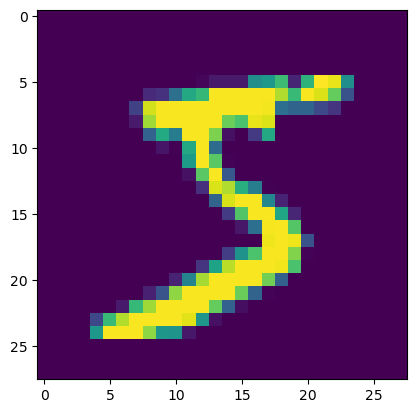

In [33]:

img, label = dataset[0]

print(f"This image is meant to express this numeral: {label}")
plt.imshow(img.squeeze())

In [34]:

# Before we can run training, there's one last thing we have to do: our images
# come labeled with what digit they're supposed to represent, but that's a
# single number, whereas our neural net outputs 10 components.
#
# That means we have to translate a number into a 10-component vector. E.g. if 2
# is the correct answer, the ideal answer from our neural net would be [0, 0, 1,
# 0, 0, 0, 0, 0, 0, 0].
#
# Doing this translation is called a "one-hot encoding." Let's implement it!

def one_hot_encoding(i: int, num_classes: int) -> t.Tensor:
    # TODO: Implement this!
    # raise NotImplementedError()
    result = t.zeros([num_classes])
    result[i] = 1
    return result


assert_tensors_within_epsilon(
    expected=t.tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
    actual=one_hot_encoding(2, 10),
)

In [35]:

# We also need to flatten an image down to a flat vector to make it suitable for
# our neural net to ingest.

def make_img_1d(imgs: t.Tensor) -> t.Tensor:
    return einops.rearrange(imgs, '... h w -> ... (h w)')

In [36]:

# This is an inefficient way of getting data from a dataset. We'll see later how
# to do this more efficiently, but for now this suffices to demonstrate the
# logic of how we're using our one-hot encoding and 1d flattening.

training_imgs = []
expected_outputs_in_training = []
non_training_imgs = []
expected_outputs_in_non_training = []
counter = 0
total_imgs = 2000
num_of_training_imgs = 1000
for img, label in dataset:
    if counter >= total_imgs:
        break
    if counter < num_of_training_imgs:
        training_imgs.append(make_img_1d(img).squeeze())
        expected_outputs_in_training.append(one_hot_encoding(label, num_classes=10))
    else:
        non_training_imgs.append(make_img_1d(img).squeeze())
        expected_outputs_in_non_training.append(one_hot_encoding(label, num_classes=10))
    counter += 1

training_imgs = t.stack(training_imgs)
expected_outputs_in_training = t.stack(expected_outputs_in_training)

In [37]:

print(f"{training_imgs.shape=}")

training_imgs.shape=torch.Size([1000, 784])


Expected label: 0
Model guessed this was: 3


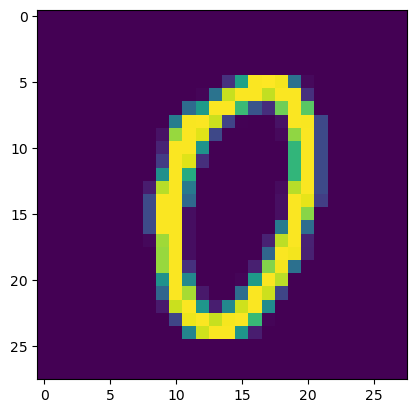

In [38]:

# Our neural net starts out with garbage predictions.

non_training_img_idx = 0
img_outside_of_training_dataset = non_training_imgs[non_training_img_idx]
label = expected_outputs_in_non_training[non_training_img_idx].argmax()

print(f"Expected label: {label}")
plt.imshow(einops.rearrange(img_outside_of_training_dataset, '(h w) -> h w', h=28))

model_all_guesses = forward(neural_net=new_neural_net, x=img_outside_of_training_dataset.unsqueeze(dim=0))
model_guess_highest_prob = forward(neural_net=new_neural_net, x=img_outside_of_training_dataset.unsqueeze(dim=0)).argmax()

print(f"Model guessed this was: {model_guess_highest_prob}")

In [39]:

# Now let's train our neural net!
train(
    neural_net=new_neural_net,
    inputs=training_imgs,
    expected_outputs=expected_outputs_in_training,
    # A learning rate of 2 is usually much too high, but we've made some sub-optimal choices in designing our 
    learning_rate=10,
    number_of_iterations=100,
)

Initial loss was 0.0900823101401329


100%|██████████| 100/100 [00:03<00:00, 29.29it/s]

Final loss was 0.0022350302897393703


Expected label: 0
Model guessed this was: 0


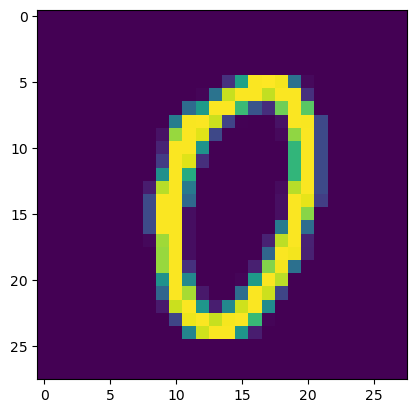

In [40]:

# And let's try again

print(f"Expected label: {label}")
plt.imshow(einops.rearrange(img_outside_of_training_dataset, '(h w) -> h w', h=28))

model_all_guesses = forward(neural_net=new_neural_net, x=img_outside_of_training_dataset.unsqueeze(dim=0))
model_guess_highest_prob = forward(neural_net=new_neural_net, x=img_outside_of_training_dataset.unsqueeze(dim=0)).argmax()

print(f"Model guessed this was: {model_guess_highest_prob}")

In [41]:

# Here's a demonstration of how we could write this using PyTorch entirely. In
# two days you will have implemented every PyTorch function and class here from
# scratch!

class SimpleNeuralNet(t.nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.implementation = t.nn.Sequential(
            t.nn.Linear(in_features=784, out_features=2000),
            t.nn.ReLU(),
            t.nn.Linear(in_features=2000, out_features=400),
            t.nn.ReLU(),
            t.nn.Linear(in_features=400, out_features=10),
            t.nn.Softmax(dim=-1),
        )

    def forward(self, t: t.Tensor):
        return self.implementation(t)


def train(model: SimpleNeuralNet, epochs: int, lr: int):
    optimizer = t.optim.SGD(model.parameters(), lr=lr)
    for epoch in tqdm(range(epochs)):
        output = model(training_imgs)
        # For those who are confused why we use MSE loss here for a
        # classification task, see https://arxiv.org/abs/2006.07322
        loss = t.nn.functional.mse_loss(output, expected_outputs_in_training)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch == 0:
            print(f"Initial loss: {loss=}")
        elif epoch == epochs - 1:
            print(f"Final loss: {loss=}")

model = SimpleNeuralNet()

In [42]:

train(model, epochs=100, lr=10)

  0%|          | 0/100 [00:00<?, ?it/s]

Initial loss: loss=tensor(0.0900, grad_fn=<MseLossBackward0>)


100%|██████████| 100/100 [00:02<00:00, 34.01it/s]

Final loss: loss=tensor(0.0056, grad_fn=<MseLossBackward0>)


Expected label: 0
Model guessed this was: 0


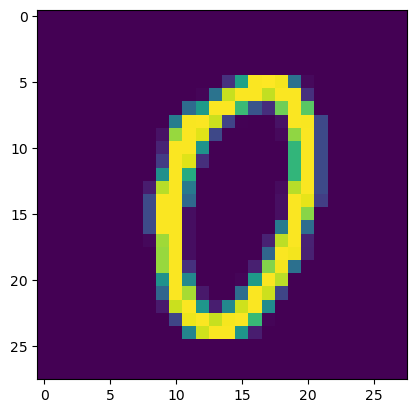

In [43]:

# Let's look at an image that wasn't part of the training data

non_training_img_idx = 0
img_outside_of_training_dataset = non_training_imgs[non_training_img_idx]
label = expected_outputs_in_non_training[non_training_img_idx].argmax()

print(f"Expected label: {label}")
plt.imshow(einops.rearrange(img_outside_of_training_dataset, '(h w) -> h w', h=28))

model_all_guesses = model(img_outside_of_training_dataset)
model_guess_highest_prob = model(img_outside_of_training_dataset).argmax()

print(f"Model guessed this was: {model_guess_highest_prob}")

In [44]:

# As a bonus exercise try to make your model display what image it thinks is the
# "most like an 8." That is try to figure out some way of creating an image that
# the model returns a very high value for in the 7th index of its output.

# I'm going to let you try to figure this one out without as much handholding!
# As a hint, think about whether you can use gradient descent (or perhaps
# ascent!) on something that isn't the model weights.